
# Using Python and pySpark
### Fluorescence, PRI and Carbon GPP relationships in Barbeau Forest 
 

### 1. Check is PySpark is available 

In [72]:
try:
    from pyspark import SparkContext
    print("PySpark is available in this machine")
except ImportError:
    print("PySpark is not installed in this machine, use pip manager to install Apache PySpark API Python")

PySpark is available in this machine


### 2. Open a PySpark session and give a name to the section

In [73]:
%reset -f
from pyspark.sql import SparkSession
# Create a SparkSession
spark = SparkSession.builder.appName("SIG_PRI_GPP").getOrCreate()
import pandas as pd
import matplotlib.pyplot as plt

## 3. Open the CSV file and print colnames usin Spark : spectral data

In [74]:

path_name= "D:/ICOS_FrFonSunInducedFluorescence/SpectralData/"
file_name= "meta_HR_24_11_2023_GH.csv"
file=path_name+file_name
print(file)
# Read a CSV file into a DataFrame
df_SpecData = spark.read.csv(file, inferSchema=True, header=True, sep=';')
#print(df_SpecData.columns)
# Print column names, each on a new line
for column in df_SpecData.columns:
    print("Column name: " + column)

D:/ICOS_FrFonSunInducedFluorescence/SpectralData/meta_HR_24_11_2023_GH.csv
Column name: Time_start
Column name: Time_end
Column name: Integration_time
Column name: PAR_micromoles_m_2s_1
Column name: PAR_total_micromoles_m_2s_1
Column name: PAR_diffus_micromoles_m_2s_1
Column name: Sunflag
Column name: IRT0_SurfaceTemperature_celsius
Column name: IRT0_SensorTemperature_celsius
Column name: IRT1_SurfaceTemperature_celsius
Column name: IRT1_SensorTemperature_celsius
Column name: BOX_Temperature_celsius
Column name: BOX_RelativeHumidity_percent
Column name: HR_peltierCurrent_ampere
Column name: HR_radiatorTemperature_celsius
Column name: LR_peltierCurrent_ampere
Column name: LR_radiatorTemperature_celsius
Column name: sun_var
Column name: nbdark_sig
Column name: nbsp_nosig
Column name: nbsp_bad
Column name: prcdarkpix_sig
Column name: prcsppix_nosig
Column name: prcsppix_sat
Column name: dark_dpix_mean
Column name: dark_dpix_std
Column name: sp_dpix_mean
Column name: sp_dpix_std
Column nam

#### 3.1.  data Types

In [75]:
df_SpecData.printSchema()

root
 |-- Time_start: string (nullable = true)
 |-- Time_end: string (nullable = true)
 |-- Integration_time: integer (nullable = true)
 |-- PAR_micromoles_m_2s_1: double (nullable = true)
 |-- PAR_total_micromoles_m_2s_1: double (nullable = true)
 |-- PAR_diffus_micromoles_m_2s_1: double (nullable = true)
 |-- Sunflag: double (nullable = true)
 |-- IRT0_SurfaceTemperature_celsius: double (nullable = true)
 |-- IRT0_SensorTemperature_celsius: double (nullable = true)
 |-- IRT1_SurfaceTemperature_celsius: double (nullable = true)
 |-- IRT1_SensorTemperature_celsius: double (nullable = true)
 |-- BOX_Temperature_celsius: double (nullable = true)
 |-- BOX_RelativeHumidity_percent: double (nullable = true)
 |-- HR_peltierCurrent_ampere: double (nullable = true)
 |-- HR_radiatorTemperature_celsius: double (nullable = true)
 |-- LR_peltierCurrent_ampere: double (nullable = true)
 |-- LR_radiatorTemperature_celsius: double (nullable = true)
 |-- sun_var: double (nullable = true)
 |-- nbdark_s

#### 3.2. Show data of PySpark (equivalent to head() in Pandas)

In [76]:
df_SpecData=df_SpecData.select('Time_start','PAR_micromoles_m_2s_1', 'mNDI', 'NDVI', 'PRI', 'SIF_SFM_Co_tot')
df_SpecData.show()

+----------------+---------------------+----+----+----+--------------+
|      Time_start|PAR_micromoles_m_2s_1|mNDI|NDVI| PRI|SIF_SFM_Co_tot|
+----------------+---------------------+----+----+----+--------------+
|01/01/2022 00:02|               0.5871|NULL|NULL|-1.0|          NULL|
|01/01/2022 00:05|               0.5253|NULL|NULL|NULL|       -5.0E-5|
|01/01/2022 00:09|               0.4944| 0.0|NULL|NULL|          NULL|
|01/01/2022 00:13|               0.4944|NULL|NULL|NULL|          NULL|
|01/01/2022 00:17|               0.8343|NULL|NULL|NULL|          NULL|
|01/01/2022 00:20|               0.5871| 1.0|NULL|NULL|          NULL|
|01/01/2022 00:24|               0.5871|NULL|NULL|NULL|          NULL|
|01/01/2022 00:28|               0.4326|NULL|NULL|NULL|          NULL|
|01/01/2022 00:32|               0.8034|NULL|NULL|NULL|          NULL|
|01/01/2022 00:36|               0.5871|NULL|NULL|-1.0|          NULL|
|01/01/2022 00:39|               0.6489|NULL|NULL|NULL|          NULL|
|01/01

#### 3.3. Dealing with timeStamp in Spark
The two columns Time_Start and Time_End are Timestamp in format dd/MM/yyyy HH:MM. In Spark the two columns have string type. How to convert them to data and time in spark

In [78]:
from pyspark.sql.functions import to_timestamp
df_SpecData= df_SpecData.withColumn("Time_start", to_timestamp("Time_start", 'dd/MM/yyyy HH:mm'))
# Convert 'Time_Start' and 'Time_End' to datetime
df_SpectData = df_SpecData.withColumn("Time_start", to_timestamp("Time_start", 'dd/MM/yyyy HH:mm'))



In [79]:
df_SpectData.printSchema()

root
 |-- Time_start: timestamp (nullable = true)
 |-- PAR_micromoles_m_2s_1: double (nullable = true)
 |-- mNDI: double (nullable = true)
 |-- NDVI: double (nullable = true)
 |-- PRI: double (nullable = true)
 |-- SIF_SFM_Co_tot: double (nullable = true)



#### 3.4. Plot time series - Note that pyspark dataframe needs to be converted to pandas dataframe


##### 3.4.1. Convert Spark DataFrame to Pandas DataFrame


In [80]:
p_df_SpectData = df_SpectData.toPandas()

c:\Users\salsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\pandas\types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
c:\Users\salsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\pandas\types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


##### 3.4.2. Plot time series 

In [81]:

p_df_SpectData['Time_start'] = pd.to_datetime(p_df_SpectData['Time_start'])
p_df_SpectData.set_index('Time_start', inplace=True)
p_df_filtered =p_df_SpectData[(p_df_SpectData['SIF_SFM_Co_tot']>= 0) & (p_df_SpectData['SIF_SFM_Co_tot']<= 0.3)]
p_df_filtered =p_df_filtered[(p_df_filtered['PRI']>= -0.2) & (p_df_filtered['PRI']<= 1)]
p_df_filtered =p_df_filtered[(p_df_filtered['NDVI']>= 0) & (p_df_filtered['NDVI']<= 1)]
p_df_filtered =p_df_filtered[(p_df_filtered['mNDI']>= 0.2) & (p_df_filtered['mNDI']<= 1)]


##### Filtering for sunny days

In [82]:
p_df_filtered=p_df_filtered[(p_df_filtered['PAR_micromoles_m_2s_1']>= 400)]


##### Filtering betwen two dates and two times

In [83]:

start_date = '2022-05-01'
end_date = '2022-09-30'
start_hour = 10
end_hour = 16

mask = (p_df_filtered.index.date >= pd.to_datetime(start_date).date()) & \
       (p_df_filtered.index.date <= pd.to_datetime(end_date).date()) & \
       (p_df_filtered.index.hour >= start_hour) & \
       (p_df_filtered.index.hour <= end_hour)

filtered_pd_Date = p_df_filtered.loc[mask]

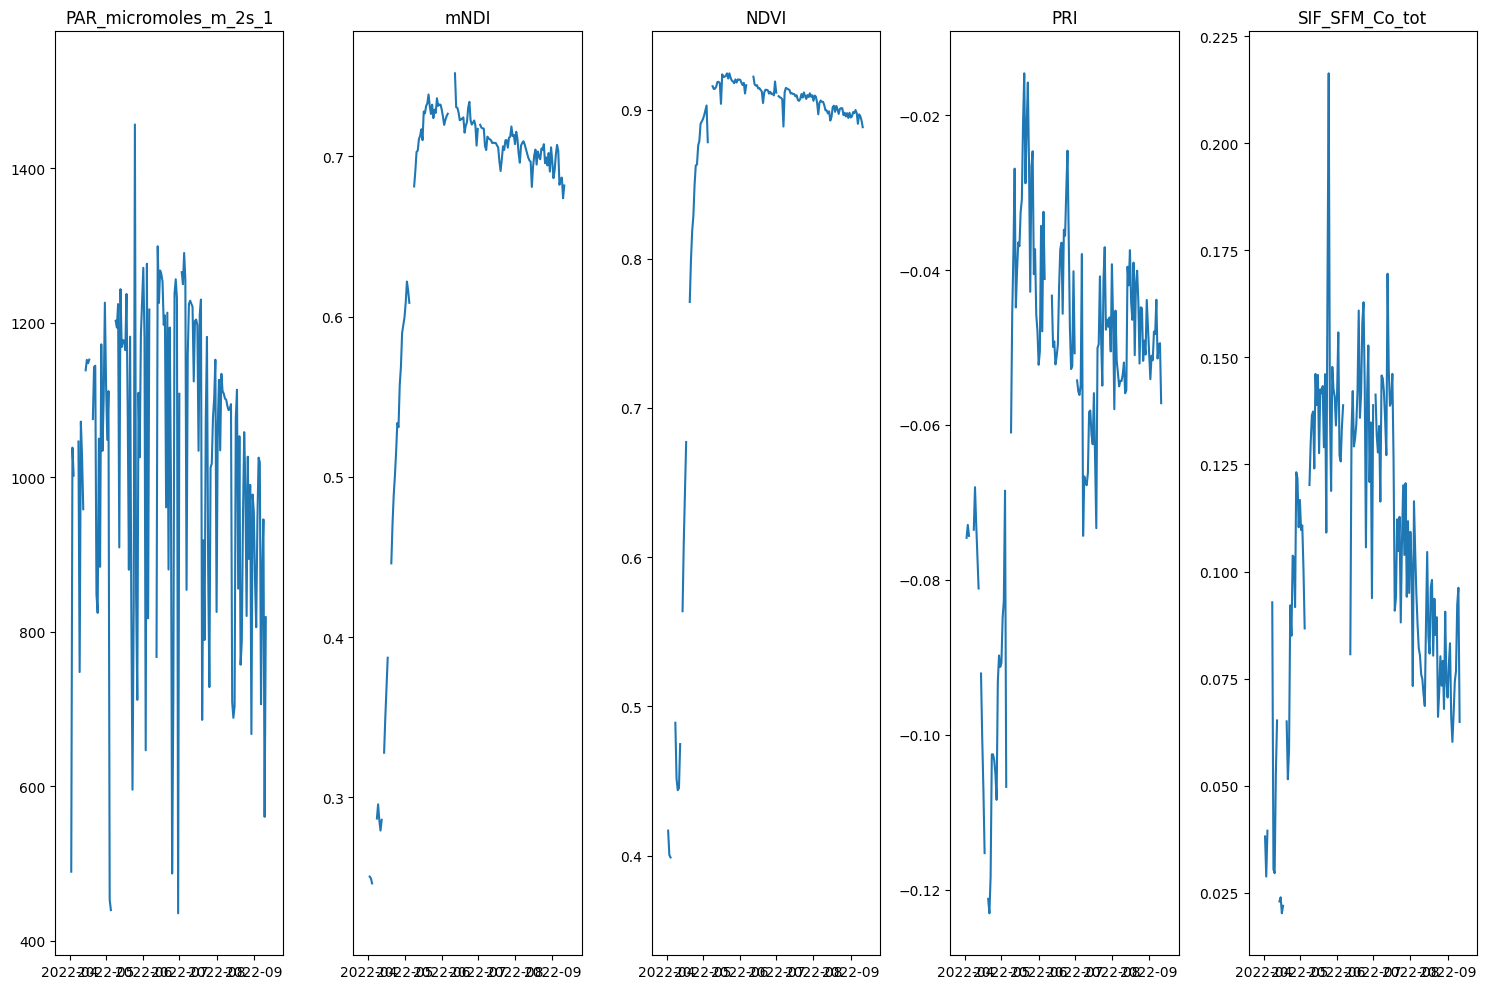

In [84]:
# Assuming `df` is your DataFrame
fig, axs = plt.subplots(1, 5, figsize=(15, 10))  # 1 row, 5 columns

variables = ['PAR_micromoles_m_2s_1', 'mNDI', 'NDVI', 'PRI', 'SIF_SFM_Co_tot']
df=p_df_filtered
for i, var in enumerate(variables):
    axs[i].plot(p_df_filtered[var].resample('D').mean())
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

##### Pairplot using seaborn

In [85]:
Subset_filteredData=filtered_pd_Date[['SIF_SFM_Co_tot','PRI','PAR_micromoles_m_2s_1','mNDI','NDVI']]

resampled_df_30mn = Subset_filteredData.resample('30T').mean()
resampled_df_30mn.head()

,SIF_SFM_Co_tot,PRI,PAR_micromoles_m_2s_1,mNDI,NDVI
Time_start,,,,,
2022-05-01 10:00:00,0.116153,-0.086467,790.388010,0.592868,0.891552
2022-05-01 10:30:00,0.104939,-0.087394,574.492800,0.592928,0.893609
2022-05-01 11:00:00,0.100794,-0.082351,600.952029,0.602933,0.894330
2022-05-01 11:30:00,0.086282,-0.078302,623.376600,0.624390,0.900825
2022-05-01 12:00:00,NaN,NaN,NaN,NaN,NaN


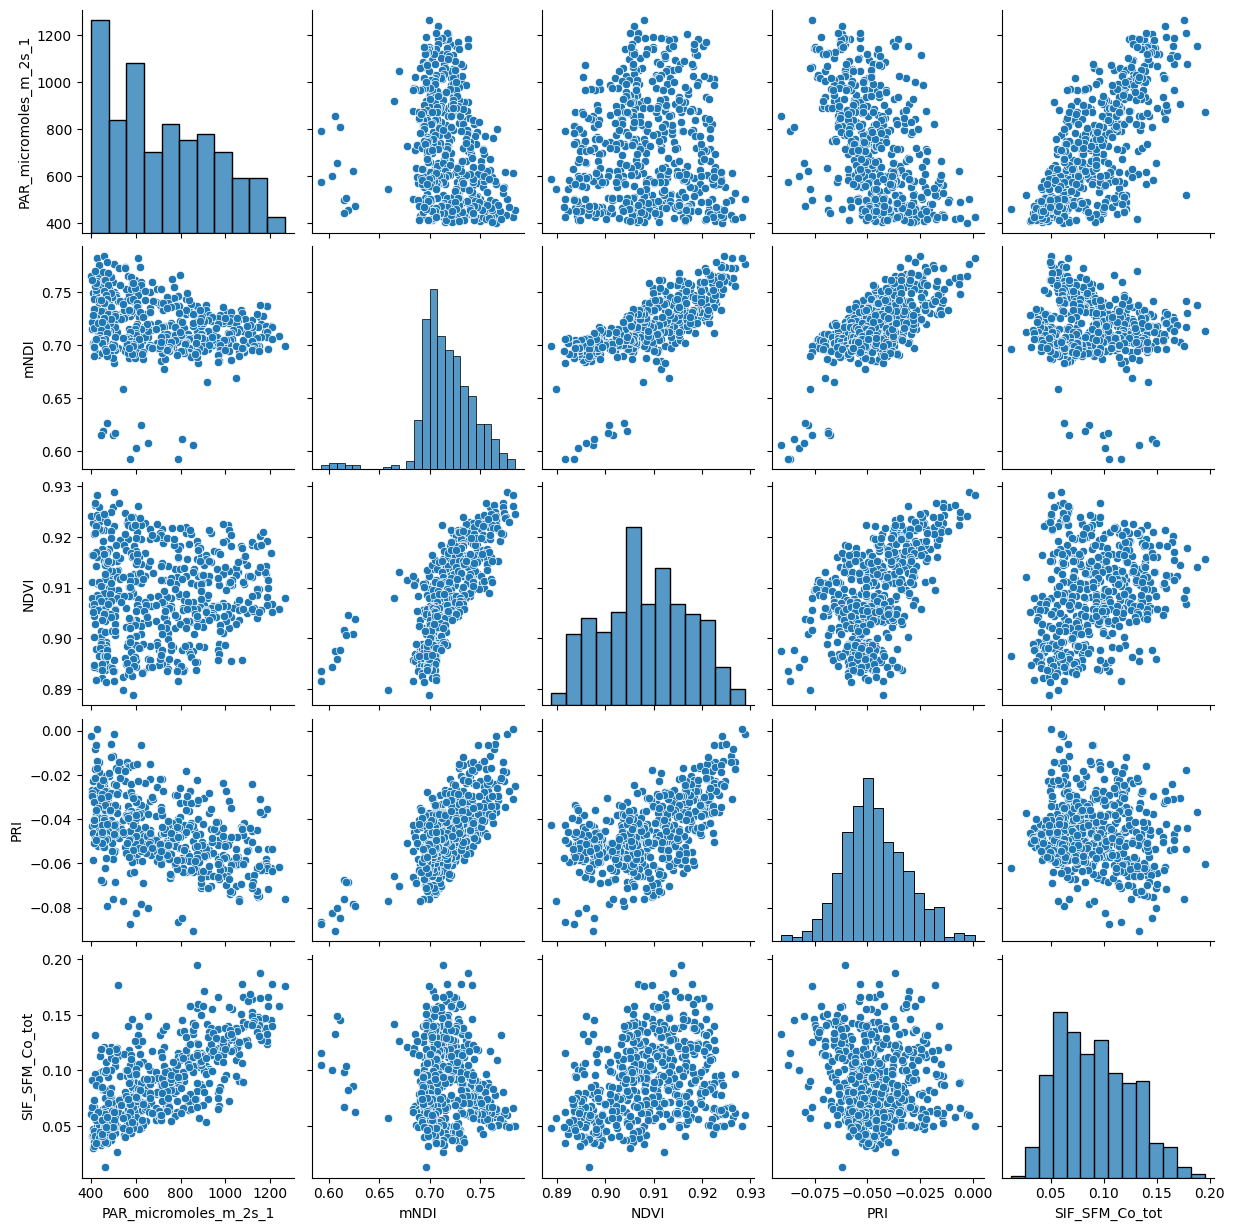

In [86]:
# Assuming `df` is your DataFrame and 'var1', 'var2', 'var3', 'var4' are your variables
import seaborn as sns
sns.pairplot(resampled_df_30mn[['PAR_micromoles_m_2s_1', 'mNDI', 'NDVI', 'PRI', 'SIF_SFM_Co_tot']])
plt.show()

## 4. Open the CSV file and print colnames usin Spark : Flux data

In [87]:
path_name= "D:/ICOS_FrFonSunInducedFluorescence/Flux/"
file_name= "Barbeau_2022_7500_noAoA_uthvar_hh_DIGF.csv"
file=path_name+file_name
print(file)
# Read a CSV file into a DataFrame
df_Flux = spark.read.csv(file, inferSchema=True, header=True, sep=';')
#print(df_SpecData.columns)
# Print column names, each on a new line
for column in df_Flux.columns:
    print("Column name: " + column)

D:/ICOS_FrFonSunInducedFluorescence/Flux/Barbeau_2022_7500_noAoA_uthvar_hh_DIGF.csv
Column name: Date
Column name: an
Column name: mois
Column name: jour
Column name: hh
Column name: jj
Column name: PAR(micromol/m2/s)
Column name: Rg (W/m2)
Column name: Ta (C)
Column name: Tsonic (C)
Column name: RH(%)
Column name: VPD(kPa)
Column name: Pression (hPa)
Column name: Prec(mm)
Column name: WS (m/s)
Column name: ustar (m/s)
Column name: Fc
Column name: Sc
Column name: CO2 (ppmv)
Column name: NEE
Column name: NEE_despiked
Column name: NEE_ustfiltred
Column name: NEEmn
Column name: NEEsd
Column name: NEEpc5
Column name: NEEpc95
Column name: GPP
Column name: GPPsd
Column name: GPPpc5
Column name: GPPpc95
Column name: TER
Column name: TERsd
Column name: TERpc5
Column name: TERpc95
Column name: qc_co2
Column name: flag_NEE_GF
Column name: LE (W/m2)
Column name: LEgf
Column name: H2O (mmol/mol)
Column name: E (mm/hh)
Column name: Fh2o (mmol/m2/s)
Column name: qc_h2o
Column name: flag_LE_GF
Column

In [88]:
from pyspark.sql.functions import to_timestamp

# Convert 'Time_Start' and 'Time_End' to datetime
df_Flux= df_Flux.withColumn("Date", to_timestamp("Date", 'dd/MM/yyyy HH:mm'))


#### 4.1. Select main variables in Flux data

In [89]:
df_Flux_select=df_Flux.select('Date','PAR(micromol/m2/s)','RH(%)','VPD(kPa)','Ta (C)','Prec(mm)','GPP','TER','ETP_Pen(W/m2)')

#### 4.2. Convert pySpark DataFrame to Pandas DataFrame for plotting

In [90]:
p_df_Flux_select= df_Flux_select.toPandas()
p_df_Flux_select['Date'] = pd.to_datetime(p_df_Flux_select['Date'])
p_df_Flux_select.set_index('Date', inplace=True)

c:\Users\salsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\pandas\types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
c:\Users\salsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\pandas\types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


In [91]:
start_date = '2022-05-01'
end_date = '2022-09-30'
start_hour = 10
end_hour = 16

mask = (p_df_Flux_select.index.date >= pd.to_datetime(start_date).date()) & \
       (p_df_Flux_select.index.date <= pd.to_datetime(end_date).date()) & \
       (p_df_Flux_select.index.hour >= start_hour) & \
       (p_df_Flux_select.index.hour <= end_hour)

Flux_filtered_pd_Date = p_df_Flux_select.loc[mask]

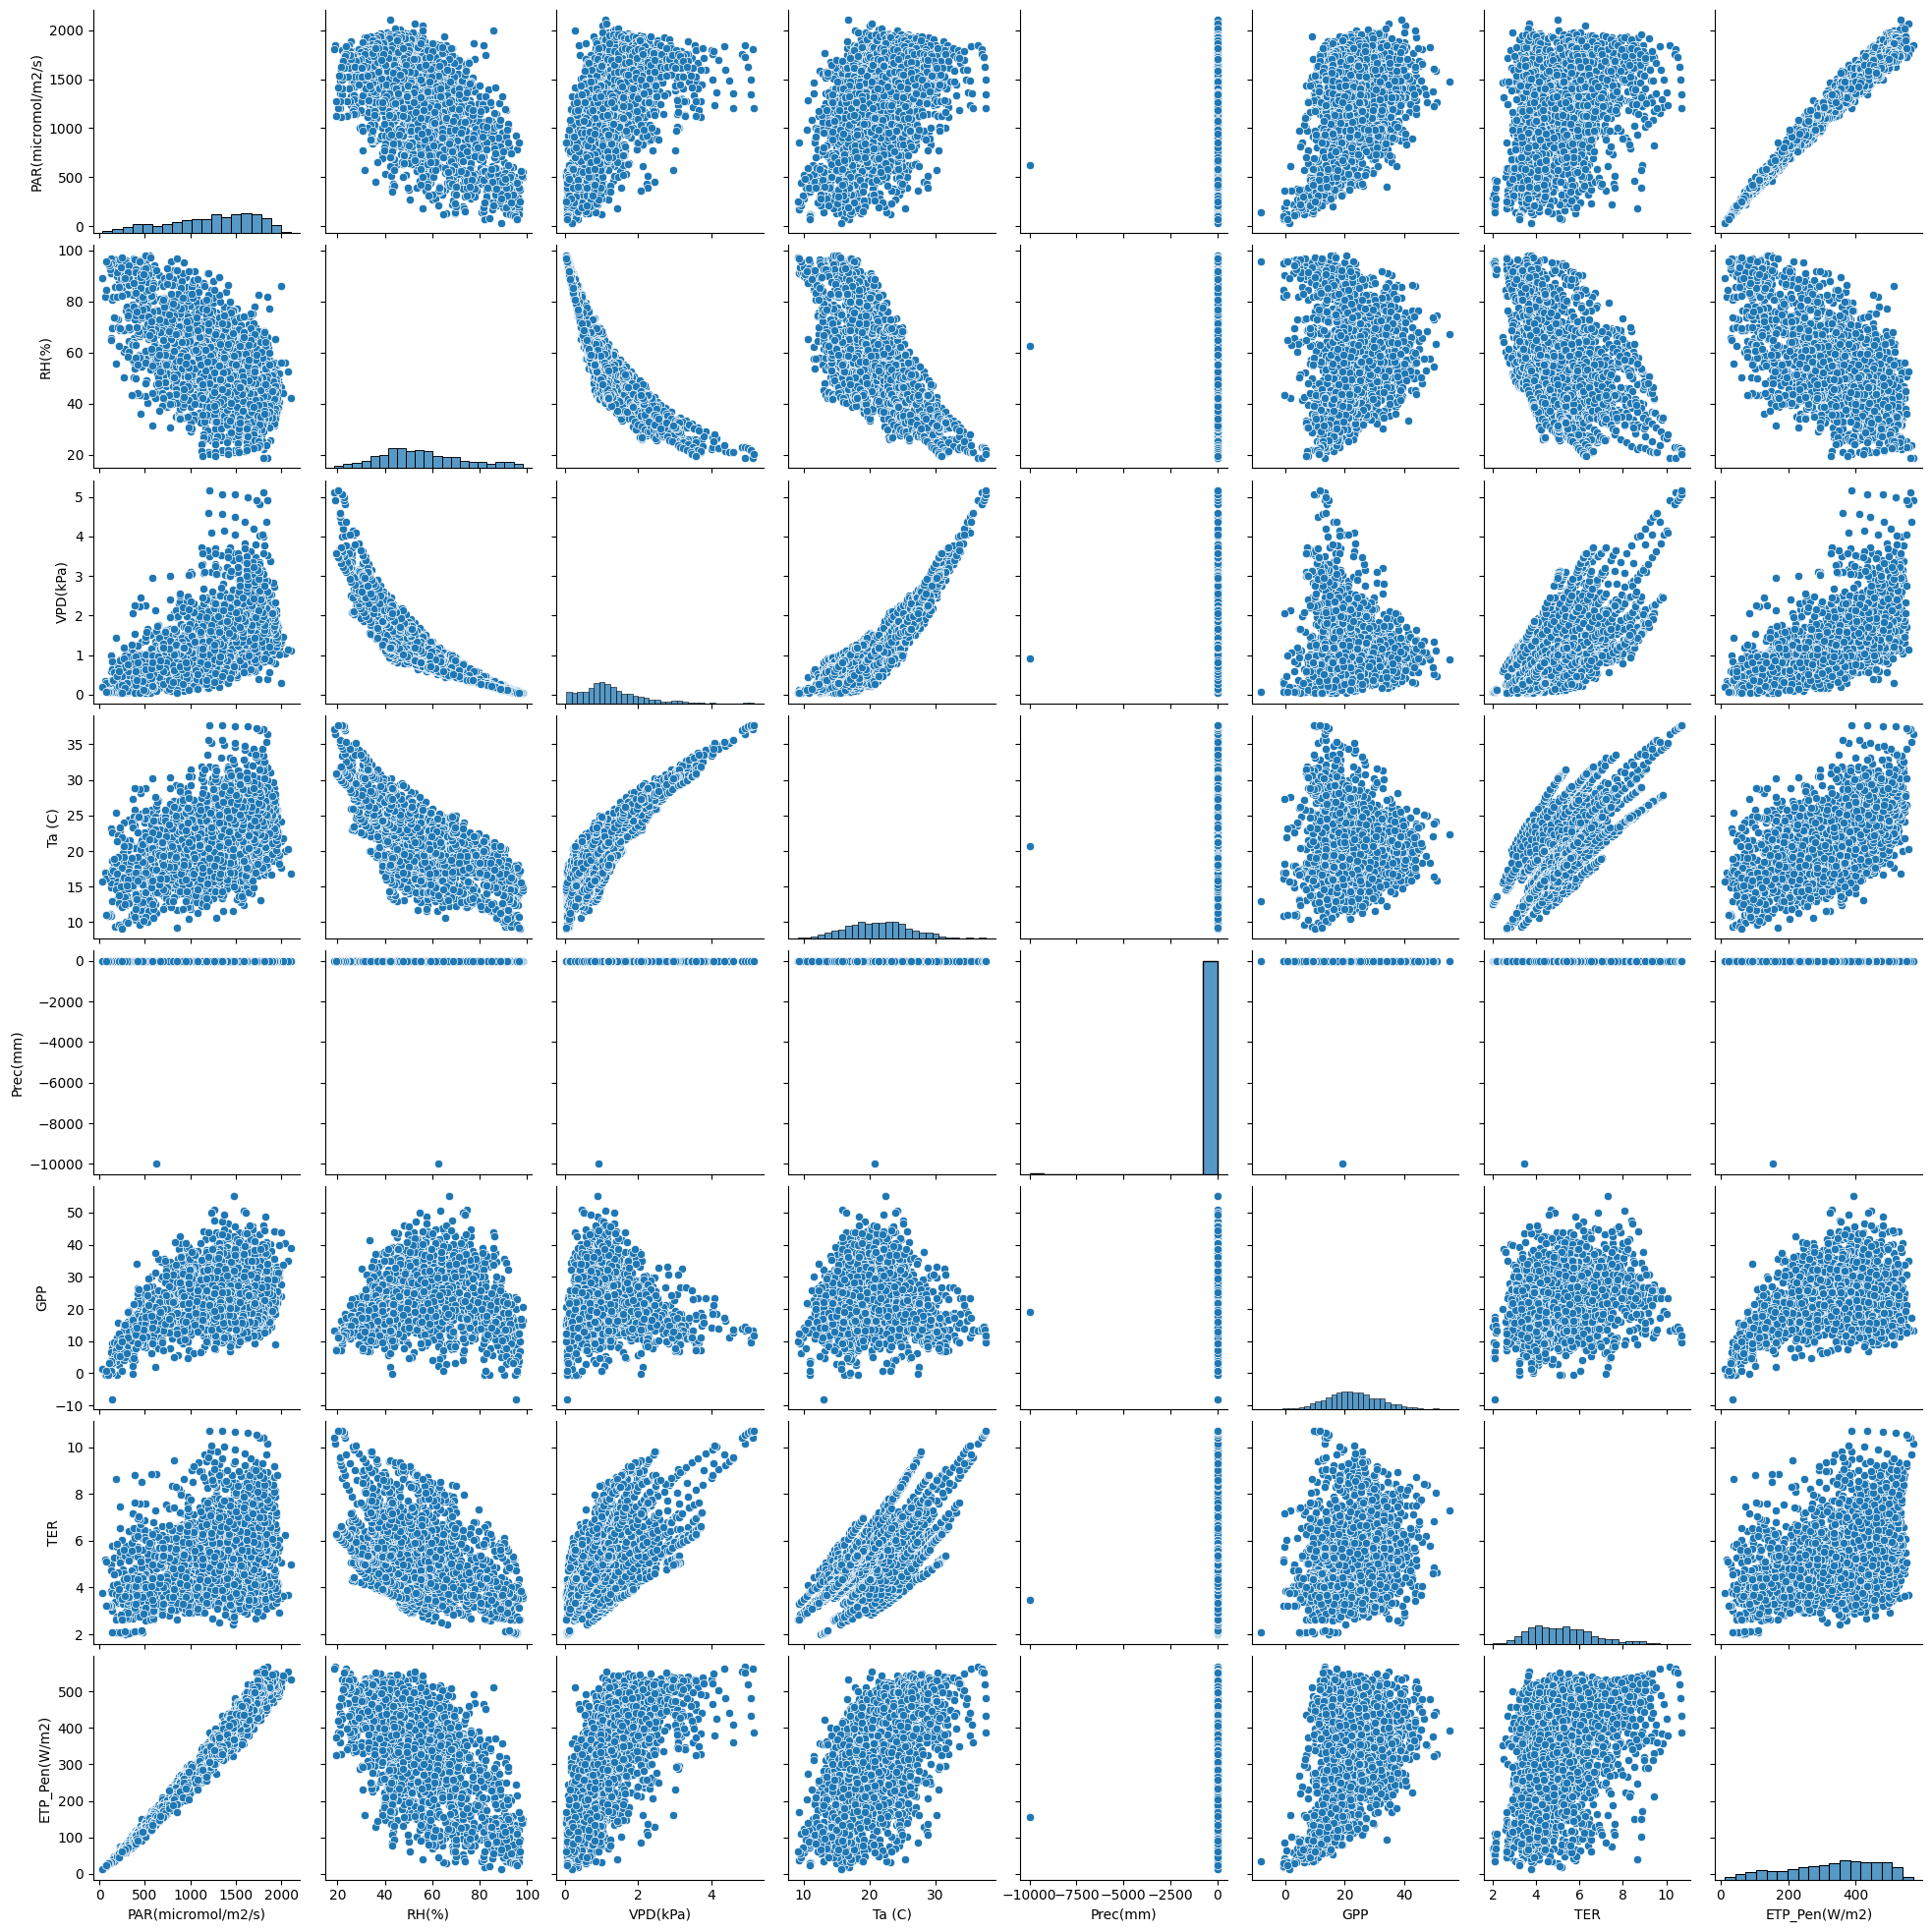

In [63]:
sns.pairplot(Flux_filtered_pd_Date)
plt.show()

## 5. Fusion of Spectral data and Flux data at half hour time step : here resampling of spectral data s done at 30mn using pyspark (easier using pandas)

In [93]:
p_df_Flux_select


NameError: name 'F' is not defined

## 5. Random Forest Regression Model using Spark MLlib

#### 4.1. Convert Pandas dataframe to PySpark dataframe

In [100]:

spark_df = spark.createDataFrame(resampled_df_30mn)
spark_df.printSchema()

root
 |-- SIF_SFM_Co_tot: double (nullable = true)
 |-- PRI: double (nullable = true)
 |-- PAR_micromoles_m_2s_1: double (nullable = true)
 |-- mNDI: double (nullable = true)
 |-- NDVI: double (nullable = true)

